# Student Result Prediction

<img src="https://cache.careers360.mobi/media/presets/860X430/article_images/2020/7/15/CBSE-Class-10-result-2020-statistics.jpg"> 


Story :
Prediction of next semester cgpa is very difficult. Prediction of next semester cgpa can be done by analyzing the past performance of a student.

Data collection :
This data has been collected manually from a website of a Technical University. Roll number has been converted to a random number for the privacy of the students. College code and subject is real and the semester cgpa is also a real world dataset.

Solution :
Prediction of the next semester marks can be determined by using machine learning algorithms. In my point of view advance regression technique can be a good performer for this case.



<img src = "https://www.rvcj.com/wp-content/uploads/2014/12/Exam.png" />

# Importing Libraries for work

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import plotly as p 
import seaborn as sns
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px 

# Reading Data From the Datasetm

In [2]:
df = pd.read_csv("data.csv") 

# View the Data

In [3]:
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16


In [4]:
df.tail()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
173,7.48,7.55,7.67,7.39,8.65,241,F,17048.0,NaN,28
174,7.30,6.41,6.59,7.11,7.38,241,M,17049.0,NaN,28
175,6.30,6.28,5.89,5.71,6.50,241,M,17050.0,NaN,28
176,7.04,7.10,6.81,7.00,6.92,241,M,17051.0,NaN,28
177,6.70,6.81,6.52,5.39,7.00,241,M,17052.0,NaN,28


In [5]:
df.shape    # View the Dimensions of the data. 

(178, 10)

In [6]:
df.describe()   # View the Statistical Summary of the Data.  

,1st,2nd,3rd,4th,5th,College Code,Roll,Roll no.,Subject Code
count,176.000000,174.000000,176.00000,173.000000,172.000000,178.000000,132.000000,46.000000,178.000000
mean,7.038864,6.943391,6.62250,7.027746,7.432558,152.983146,17040.666667,17042.500000,18.359551
std,0.859521,0.881088,0.91926,1.035675,1.068866,48.357599,13.622874,13.422618,4.782849
min,3.850000,3.900000,3.96000,4.290000,4.000000,115.000000,17017.000000,17020.000000,16.000000
25%,6.440000,6.380000,6.14000,6.330000,6.750000,115.000000,17029.000000,17031.250000,16.000000
50%,7.070000,6.800000,6.68500,7.070000,7.590000,116.000000,17040.000000,17042.500000,16.000000
75%,7.590000,7.612500,7.26000,7.860000,8.210000,165.000000,17051.000000,17053.750000,16.000000
max,9.150000,9.210000,9.59000,9.310000,9.460000,241.000000,17067.000000,17065.000000,28.000000


In [7]:
df.describe().T   # Transpose of the Statistical summary view. 

,count,mean,std,min,25%,50%,75%,max
1st,176.0,7.038864,0.859521,3.85,6.44,7.070,7.5900,9.15
2nd,174.0,6.943391,0.881088,3.90,6.38,6.800,7.6125,9.21
3rd,176.0,6.622500,0.919260,3.96,6.14,6.685,7.2600,9.59
4th,173.0,7.027746,1.035675,4.29,6.33,7.070,7.8600,9.31
5th,172.0,7.432558,1.068866,4.00,6.75,7.590,8.2100,9.46
College Code,178.0,152.983146,48.357599,115.00,115.00,116.000,165.0000,241.00
Roll,132.0,17040.666667,13.622874,17017.00,17029.00,17040.000,17051.0000,17067.00
Roll no.,46.0,17042.500000,13.422618,17020.00,17031.25,17042.500,17053.7500,17065.00
Subject Code,178.0,18.359551,4.782849,16.00,16.00,16.000,16.0000,28.00


In [8]:
pd.set_option('precision',2)  # Just for viewing the Data More clearly. 
df.describe()

,1st,2nd,3rd,4th,5th,College Code,Roll,Roll no.,Subject Code
count,176.00,174.00,176.00,173.00,172.00,178.00,132.00,46.00,178.00
mean,7.04,6.94,6.62,7.03,7.43,152.98,17040.67,17042.50,18.36
std,0.86,0.88,0.92,1.04,1.07,48.36,13.62,13.42,4.78
min,3.85,3.90,3.96,4.29,4.00,115.00,17017.00,17020.00,16.00
25%,6.44,6.38,6.14,6.33,6.75,115.00,17029.00,17031.25,16.00
50%,7.07,6.80,6.69,7.07,7.59,116.00,17040.00,17042.50,16.00
75%,7.59,7.61,7.26,7.86,8.21,165.00,17051.00,17053.75,16.00
max,9.15,9.21,9.59,9.31,9.46,241.00,17067.00,17065.00,28.00


In [9]:
df.info()   # Data type of the Data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           176 non-null    float64
 1   2nd           174 non-null    float64
 2   3rd           176 non-null    float64
 3   4th           173 non-null    float64
 4   5th           172 non-null    float64
 5   College Code  178 non-null    int64  
 6   Gender        177 non-null    object 
 7   Roll          132 non-null    float64
 8   Roll no.      46 non-null     float64
 9   Subject Code  178 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.0+ KB


- We can see there is a column name Gender which doesn't have int or float values. So, I want to see that data. 

In [10]:
df['Gender'] 

0      Female
1        Male
2      Female
3        Male
4        Male
        ...  
173         F
174         M
175         M
176         M
177         M
Name: Gender, Length: 178, dtype: object

- There are some values that are Female and Some are Male and others are F and M. 
So in it we have to make similar values like F for female and M for Male. 

In [11]:
df['Gender'].replace({'Female':'F','Male':'M'},inplace=True)

In [12]:
df['Gender']  

0      F
1      M
2      F
3      M
4      M
      ..
173    F
174    M
175    M
176    M
177    M
Name: Gender, Length: 178, dtype: object

- Now Our values of the Gender Column is set. 

In [13]:
df

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,F,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,M,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,F,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,M,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,M,NaN,17024.0,16
...,...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,17048.0,NaN,28
174,7.30,6.41,6.59,7.11,7.38,241,M,17049.0,NaN,28
175,6.30,6.28,5.89,5.71,6.50,241,M,17050.0,NaN,28
176,7.04,7.10,6.81,7.00,6.92,241,M,17051.0,NaN,28


- We can see that there are NaN values in the Roll Number Column. 

# Handling Missing values

In [14]:
df.isnull().sum()

1st               2
2nd               4
3rd               2
4th               5
5th               6
College Code      0
Gender            1
Roll             46
Roll no.        132
Subject Code      0
dtype: int64

In [15]:
df['Subject Code'].value_counts() 

16    143
28     35
Name: Subject Code, dtype: int64

In [16]:
df['College Code'].value_counts()

116    51
115    46
165    46
241    35
Name: College Code, dtype: int64

In [17]:
df['Gender'].value_counts()

M    149
F     28
Name: Gender, dtype: int64

- make Roll No values in the Int type

In [18]:
df['Roll'].fillna(0,inplace=True)        # Replacing Null values from 0 
df['Roll no.'].fillna(0,inplace=True)                 # Replacing Null values from 0 

df['Roll_no']=df['Roll']+df['Roll no.']            # combining two columns into one. 
df.drop(columns=['Roll','Roll no.'],inplace=True)

In [19]:
df['Roll_no'].astype(int)

0      17020
1      17021
2      17022
3      17023
4      17024
       ...  
173    17048
174    17049
175    17050
176    17051
177    17052
Name: Roll_no, Length: 178, dtype: int64

In [20]:
df.isnull().sum()

1st             2
2nd             4
3rd             2
4th             5
5th             6
College Code    0
Gender          1
Subject Code    0
Roll_no         0
dtype: int64

- There are some Null values in the Data also. 

In [21]:
df.describe()

,1st,2nd,3rd,4th,5th,College Code,Subject Code,Roll_no
count,176.00,174.00,176.00,173.00,172.00,178.00,178.00,178.00
mean,7.04,6.94,6.62,7.03,7.43,152.98,18.36,17041.14
std,0.86,0.88,0.92,1.04,1.07,48.36,4.78,13.56
min,3.85,3.90,3.96,4.29,4.00,115.00,16.00,17017.00
25%,6.44,6.38,6.14,6.33,6.75,115.00,16.00,17030.00
50%,7.07,6.80,6.69,7.07,7.59,116.00,16.00,17041.00
75%,7.59,7.61,7.26,7.86,8.21,165.00,16.00,17052.00
max,9.15,9.21,9.59,9.31,9.46,241.00,28.00,17067.00


In [22]:
df['1st'].mean()

7.03886363636364

In [23]:
df['Gender'].fillna(0,inplace=True)                 # Replacing Null values from 0 




df['1st'].fillna(df['1st'].mean(),inplace = True)        # Replacing Null values from 0  
df['2nd'].fillna(df['2nd'].mean(),inplace=True)        # Replacing Null values from 0  
df['3rd'].fillna(df['3rd'].mean(),inplace=True)        # Replacing Null values from 0  
df['4th'].fillna(df['4th'].mean(),inplace=True)        # Replacing Null values from 0  
df['5th'].fillna(df['5th'].mean(),inplace=True)        # Replacing Null values from 0   

In [24]:
df.isnull().sum()

1st             0
2nd             0
3rd             0
4th             0
5th             0
College Code    0
Gender          0
Subject Code    0
Roll_no         0
dtype: int64

# We can combine College Code, Subject Code and Roll_no Column together 

In [25]:
df['College Code']=df['College Code'].astype(str)
df['Subject Code']=df['Subject Code'].astype(str)
df['Roll_no']=df['Roll_no'].astype(str)
df['studentid']=df['College Code']+df['Subject Code']+df['Roll_no']
df['studentid']

0      1151617020.0
1      1151617021.0
2      1151617022.0
3      1151617023.0
4      1151617024.0
           ...     
173    2412817048.0
174    2412817049.0
175    2412817050.0
176    2412817051.0
177    2412817052.0
Name: studentid, Length: 178, dtype: object

In [26]:
df.drop(columns=['Subject Code','Roll_no'],inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           178 non-null    float64
 1   2nd           178 non-null    float64
 2   3rd           178 non-null    float64
 3   4th           178 non-null    float64
 4   5th           178 non-null    float64
 5   College Code  178 non-null    object 
 6   Gender        178 non-null    object 
 7   studentid     178 non-null    object 
dtypes: float64(5), object(3)
memory usage: 11.2+ KB


- Now there are no Null values in the whole data. 

In [28]:
# I want to find a variable that have relationship with the 1st, 2nd, 3rd, 4th and 5th Column.

df['Avg']=(df['1st']+df['2nd']+df['3rd']+df['4th']+df['5th'])/5

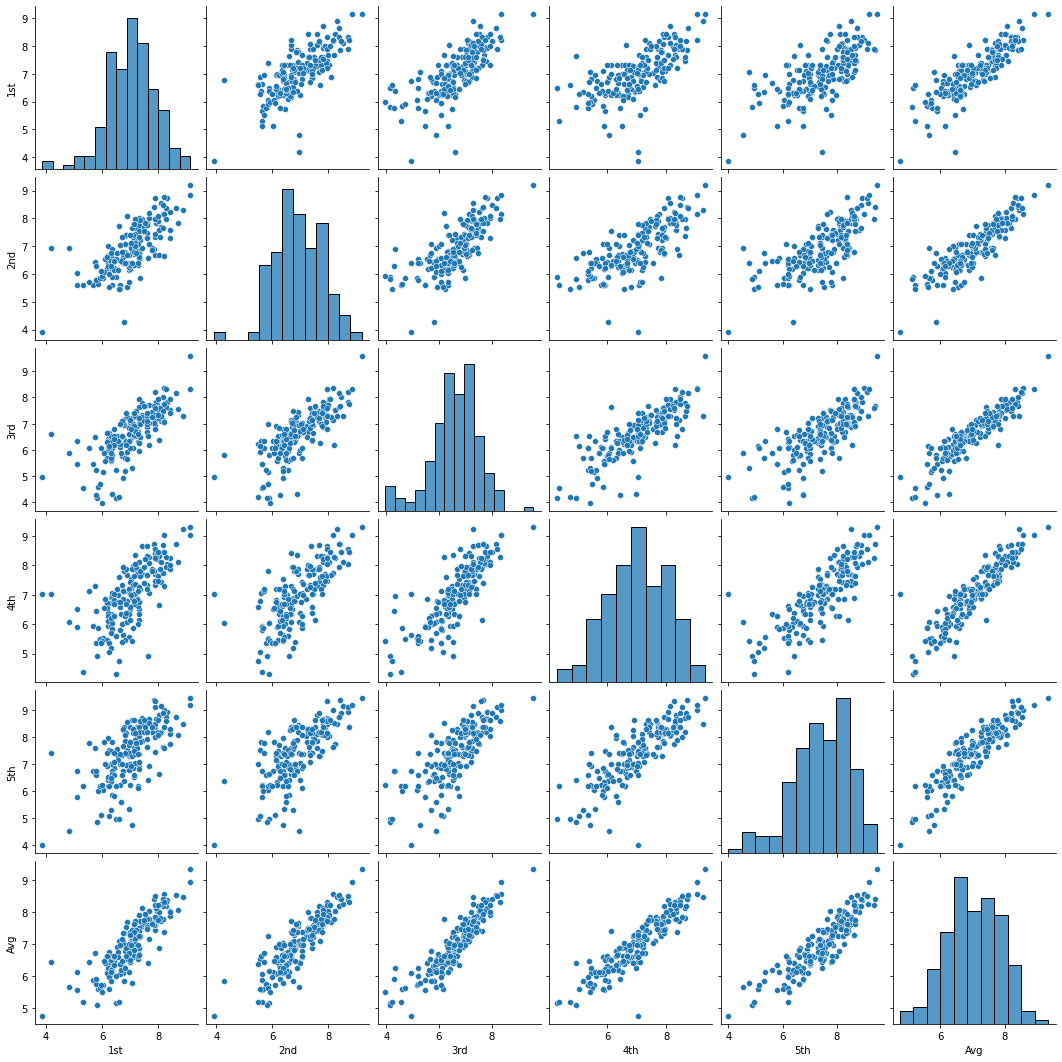

In [29]:
# Pair plot of correlation

import seaborn as sns
sns.pairplot(df)

In [30]:
df

,1st,2nd,3rd,4th,5th,College Code,Gender,studentid,Avg
0,8.11,7.68,7.11,7.43,8.18,115,F,1151617020.0,7.70
1,6.48,5.90,4.15,4.29,4.96,115,M,1151617021.0,5.16
2,8.41,8.24,7.52,8.25,7.75,115,F,1151617022.0,8.03
3,7.33,6.83,6.33,6.79,6.89,115,M,1151617023.0,6.83
4,7.89,7.34,7.22,7.32,7.46,115,M,1151617024.0,7.45
...,...,...,...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,241,F,2412817048.0,7.75
174,7.30,6.41,6.59,7.11,7.38,241,M,2412817049.0,6.96
175,6.30,6.28,5.89,5.71,6.50,241,M,2412817050.0,6.14
176,7.04,7.10,6.81,7.00,6.92,241,M,2412817051.0,6.97


# Select only relevent columns only. 

In [31]:
df1 = df[['1st','2nd', '3rd', '4th','5th','Avg']] 

In [32]:
df1

,1st,2nd,3rd,4th,5th,Avg
0,8.11,7.68,7.11,7.43,8.18,7.70
1,6.48,5.90,4.15,4.29,4.96,5.16
2,8.41,8.24,7.52,8.25,7.75,8.03
3,7.33,6.83,6.33,6.79,6.89,6.83
4,7.89,7.34,7.22,7.32,7.46,7.45
...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,7.75
174,7.30,6.41,6.59,7.11,7.38,6.96
175,6.30,6.28,5.89,5.71,6.50,6.14
176,7.04,7.10,6.81,7.00,6.92,6.97


In [33]:
from sklearn.model_selection import train_test_split

X = df1
y = df['Avg'] 

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=1/3, random_state=21)


In [34]:
X

,1st,2nd,3rd,4th,5th,Avg
0,8.11,7.68,7.11,7.43,8.18,7.70
1,6.48,5.90,4.15,4.29,4.96,5.16
2,8.41,8.24,7.52,8.25,7.75,8.03
3,7.33,6.83,6.33,6.79,6.89,6.83
4,7.89,7.34,7.22,7.32,7.46,7.45
...,...,...,...,...,...,...
173,7.48,7.55,7.67,7.39,8.65,7.75
174,7.30,6.41,6.59,7.11,7.38,6.96
175,6.30,6.28,5.89,5.71,6.50,6.14
176,7.04,7.10,6.81,7.00,6.92,6.97


In [35]:
y

0      7.70
1      5.16
2      8.03
3      6.83
4      7.45
       ... 
173    7.75
174    6.96
175    6.14
176    6.97
177    6.48
Name: Avg, Length: 178, dtype: float64

In [36]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(X_train,y_train)

round( (regr.score(X_test,y_test)*100) , 2   )

100.0

In [37]:
round( (regr.score(X_train,y_train)*100) , 2   ) 

100.0

In [38]:
regr.predict([[20, 334.34, 34.3443, 34.34, 12, 234.324423]])  

array([234.21973422])

In [39]:
regr.intercept_

-1.7763568394002505e-15

In [40]:
y_pred = regr.predict(X_test)
difference = y_test - y_pred
dif = round(difference, 2)   
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': dif})
df3.head()

,Actual,Predicted,Difference
13,6.62,6.62,0.0
113,7.25,7.25,-0.0
21,8.37,8.37,0.0
143,8.31,8.31,0.0
173,7.75,7.75,-0.0


# Residual Sum of Squares

In [41]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)
min_rss

1st    8.88e+03
2nd    8.88e+03
3rd    8.88e+03
4th    8.88e+03
5th    8.88e+03
Avg    4.48e-03
dtype: float64

# MSE

In [42]:
mse = min_rss/len(y)                                   #  min_rss / degree of freedom   
mse                                   #value should be 0 to infinite but not negative. 

1st    4.99e+01
2nd    4.99e+01
3rd    4.99e+01
4th    4.99e+01
5th    4.99e+01
Avg    2.52e-05
dtype: float64

# Stats Model

In [43]:
#  OLS = ordinary least square method. 

import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y,X2) 
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.904e+30
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        18:08:04   Log-Likelihood:                 5769.7
No. Observations:                 178   AIC:                        -1.153e+04
Df Residuals:                     172   BIC:                        -1.151e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.72e-15   1.36e-15      1.998      0.047    3.25e-17    5.41e-15
1st            0.1667   2.94e-16   5.67e+14      0.000       0.167       0.167
2nd            0.1667   3.16e-16   5.28e+14      0.000       0.167       0.167
3rd            0.1667   3.37e-16   4.95e+14      0.000       0.167       0.167
4th            0.1667   3.09e-16   5.39e+14      0.000       0.167       0.167
5th            0.1667   2.81e-16   5.92e+14      0.000       0.167       0.167
Avg            0.1667   3.24e-17   5.15e+15      0.000       0.167       0.167
==============================================================================
Omnibus:                        1.231   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                0.869
Skew:                          -0.128   Prob(JB):                        0.648
Kurtosis:                       3.227   Cond. No.                     1.88e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]